<a href="https://colab.research.google.com/github/brunolira1/previs-o-de-churns-de-clientes/blob/main/Previs%C3%A3o_de_Churn_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introdução

Integrantes: Bruno Lira, Guilherme Moreira, Victor Couto

Contexto de negócio: Um banco qualquer que tem acesso a vários dados de clientes nos quais podem ter suas contas ativas ou não (conta não ativa significa que o cliente churnou)

Objetivo de negócio: por meio da análise dos dados e de métodos de machine learning, fazer uma separação, por meio das informações existentes, dos clientes que churnam e os que não churnam, para assim entender as características dos clientes que costumam churnar, e prever quais clientes novos são mais prováveis de cometer churns baseado em suas características para assim a empresa se antecipar e tentar de alguma forma evitar que esses churns ocorram.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('BankChurners.csv')
df = df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Análise de Dados

In [ ]:
df.groupby(by='Attrition_Flag').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [ ]:
df.groupby(['Attrition_Flag', 'Gender', 'Income_Category']).mean()

Customer_Age  ...  Avg_Utilization_Ratio
Attrition_Flag    Gender Income_Category                ...                       
Attrited Customer F      $40K - $60K         46.355422  ...               0.196000
                         Less than $40K      46.503436  ...               0.222876
                         Unknown             47.252747  ...               0.154495
                  M      $120K +             47.873016  ...               0.064532
                         $40K - $60K         45.390476  ...               0.139181
                         $60K - $80K         46.301587  ...               0.086090
                         $80K - $120K        47.033058  ...               0.111640
                         Less than $40K      44.966667  ...               0.264867
                         Unknown             55.000000  ...               0.000000
Existing Customer F      $40K - $60K         47.143868  ...               0.377301
                         Less than $40K      46.321984  ...               0.412005
                         Unknown             46.031891  ...               0.237638
                  M      $120K +             47.547421  ...               0.138048
                         $40K - $60K         44.794337  ...               0.297382
                         $60K - $80K         45.916735  ...               0.224770
                         $80K - $120K        46.314772  ...               0.171026
                         Less than $40K      45.712551  ...               0.374879
                         Unknown             46.085106  ...               0.186745

[18 rows x 14 columns]

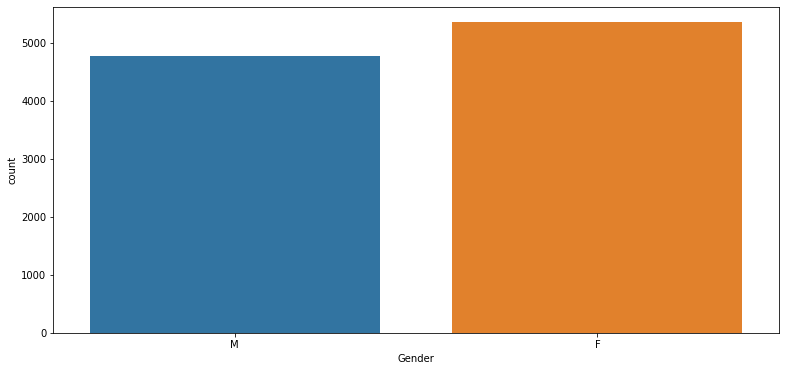

In [ ]:
#Gênero
plt.figure(figsize=(13,6))
plot=sns.countplot(x=df.Gender)
plt.show()

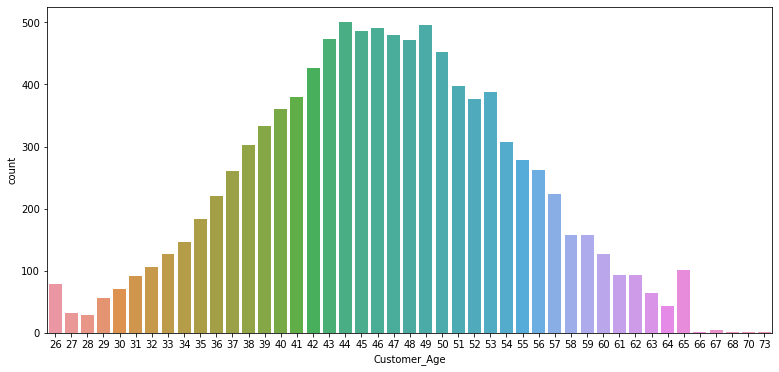

In [ ]:
#Idade
plt.figure(figsize=(13,6))
plot=sns.countplot(x=df.Customer_Age)
plt.show()

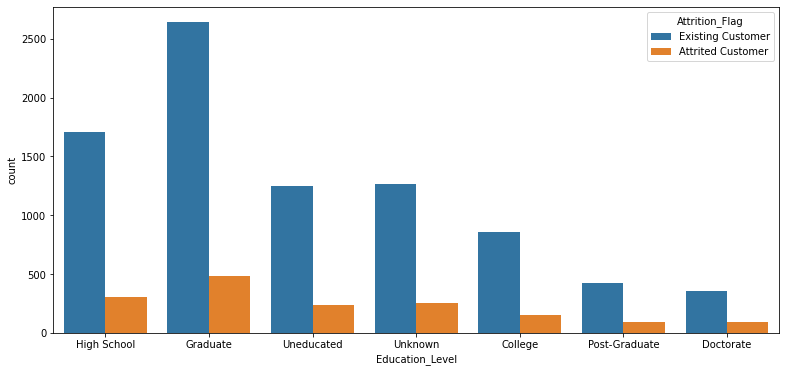

In [ ]:
#Educação
plt.figure(figsize=(13,6))
plot=sns.countplot(x=df.Education_Level,hue=df.Attrition_Flag)
plt.show()

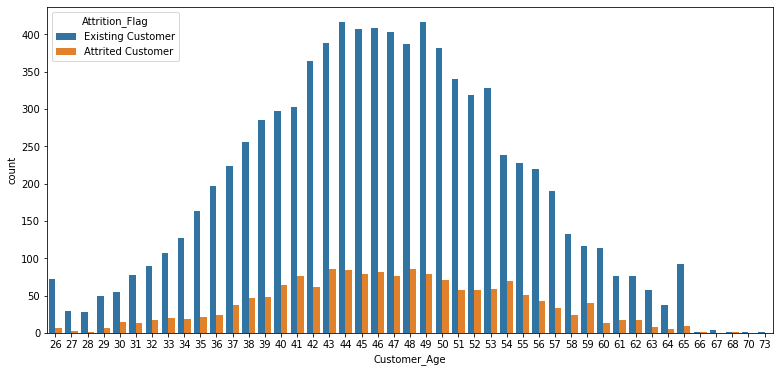

In [ ]:
#Idade por tipo de cliente
plt.figure(figsize=(13,6))
plot=sns.countplot(x=df.Customer_Age,hue=df.Attrition_Flag)
plt.show()

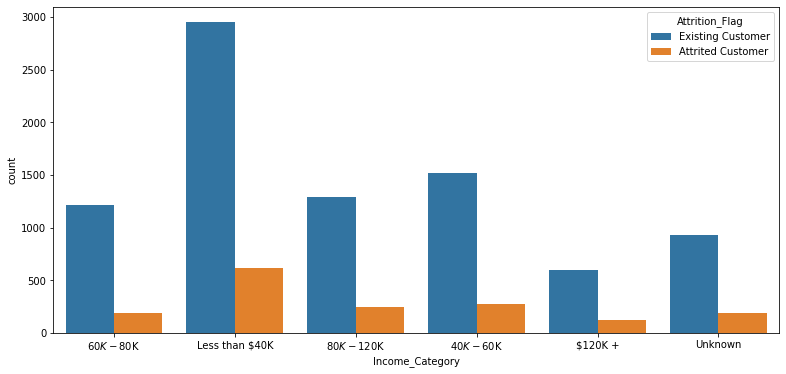

In [ ]:
#Quantidade de clientes por renda e tipo
plt.figure(figsize=(13,6))
plot=sns.countplot(x=df.Income_Category,hue=df.Attrition_Flag)
plt.show()

<Figure size 936x432 with 0 Axes>

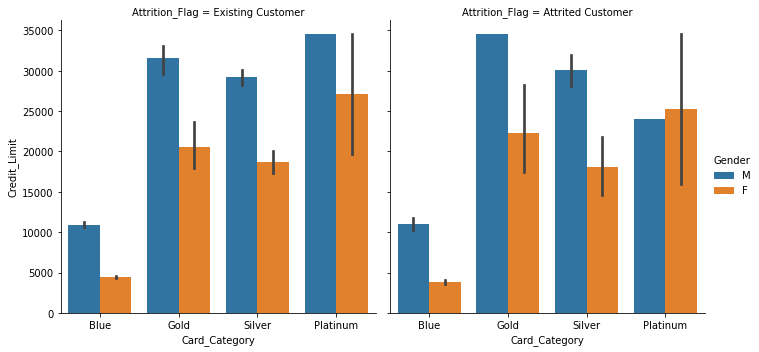

In [ ]:
plt.figure(figsize=(13,6))
plot=sns.catplot(x='Card_Category',y='Credit_Limit',col='Attrition_Flag',hue='Gender',data=df,kind='bar')
plt.show()

<Figure size 1224x432 with 0 Axes>

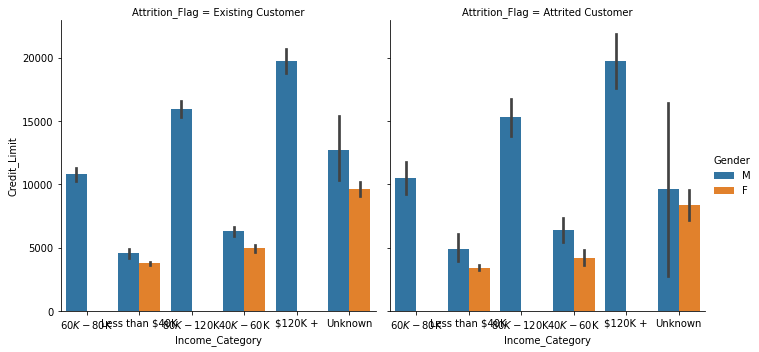

In [ ]:
plt.figure(figsize=(17,6))
plot=sns.catplot(x='Income_Category',y='Credit_Limit',col='Attrition_Flag',hue='Gender',data=df,kind='bar')
plt.show()

<Figure size 1224x432 with 0 Axes>

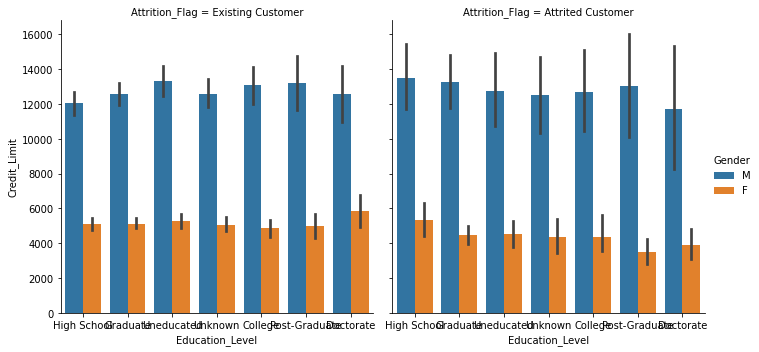

In [ ]:
plt.figure(figsize=(17,6))
plot=sns.catplot(x='Education_Level',y='Credit_Limit',col='Attrition_Flag',hue='Gender',data=df,kind='bar')
plt.show()

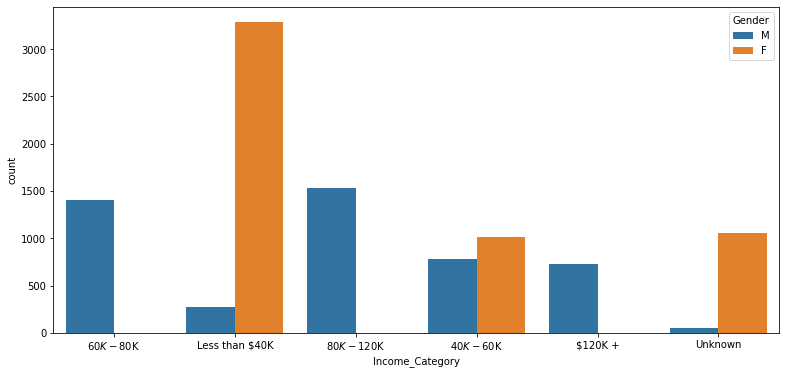

In [ ]:
plt.figure(figsize=(13,6))
plot=sns.countplot(x=df.Income_Category,hue=df.Gender)
plt.show()

# Decision Tree

O primeiro modelo de machine learning que iremos aplicar no nosso dataset é o decision tree. É um modelo muito conhecido e utilizado, no qual visa formar caminhos que vão dividindo os dados em pequenos grupos, de acordo com suas características, para então dizer se um cliente se encaixa no grupo dos churners ou dos não-churners de acordo com as características dele.

In [ ]:
#Importando as bibliotecas
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#Definindo as features (X) do nosso modelo
X = df.copy()
X = X.drop('Attrition_Flag', axis=1)
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
#Definindo o target (y) do nosso modelo
y = df['Attrition_Flag']
y

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [ ]:
#Transformando as colunas com valores categóricos para valores numéricos de acordo com o método factorize()
stacked = X[['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']].stack()
X[['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']] = pd.DataFrame(stacked.factorize()[0], index=stacked.index).unstack()
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,0,3,1,2,3,4,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,5,6,7,8,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,0,3,6,2,9,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,5,4,1,10,8,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,0,3,11,2,3,4,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,6,7,12,4,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,0,2,10,19,12,4,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,5,1,1,2,8,4,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,0,2,6,10,12,4,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
# Criando o modelo
modelo = DecisionTreeClassifier(criterion='entropy')

#Treinaremos nosso modelo passando nossos valores de X e y
modelo = modelo.fit(X, y)

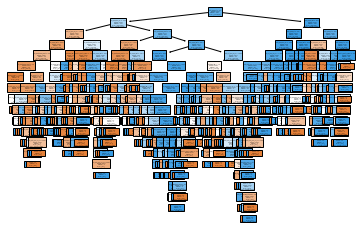

In [ ]:
# Gerando o gráfico
grafico = tree.plot_tree(modelo, feature_names=X.columns, class_names=np.unique(y), filled=True)

O gráfico acima mostra como é feito passo a passo a decisão, como os grupos são divididos até ser definido de qual grupo pertence um cliente. 

Exemplo: Temos ali o primeiro bloco (o mais acima) supomos que se a idade do cliente é maior que 30, ele segue o caminho a direita desse primeiro bloco, e se a sua idade for menor que 30, ele segue o caminho a esquerda do primeiro bloco. Dessa forma são feitas as divisões, até ser definido em qual grupo o cliente pertence.

Infelizmente o gráfico não é visível para nós pois ele é muito grande e o espaço em que ele está sendo apresentado é pequeno.

In [ ]:
#Método que nos retorna a importância de cada coluna do dataset (X) ao definir de que classe cada indivíduo pertence
modelo.feature_importances_

array([0.03396438, 0.00219013, 0.00671839, 0.00619835, 0.00560698,
       0.00750473, 0.0004278 , 0.01107476, 0.0780061 , 0.00987073,
       0.00989132, 0.01302899, 0.14523725, 0.01180173, 0.05811486,
       0.17625835, 0.3284858 , 0.08203083, 0.01358851])

Podemos perceber que as colunas mais importantes do gráfico, para definir em que grupo pertence um cliente, são as colunas 'Total_Trans_Amt' e 'Total_Trans_Ct' que representam respectivamente o valor total transacionado pelo cliente utilizando o cartão do banco, e a quantidade de transações feitas pelo cliente utilizando o cartão do banco. Podemos perceber que os clientes que costumam churnar são aqueles que utilizam menos o seu cartão.

Algo interessante de se reparar também é o valor de 0.002 retornado á coluna 'Gender' do dataset, indicando que o gênero da pessoa não influencia em praticamente nada a decisão do modelo em qual grupo encaixar a pessoa, ou seja, vemos que não é um modelo sexista, que favorece pessoas de acordo com seu gênero.

In [ ]:
#Vamos testar a acurácia do nosso modelo
#Primeiro de tudo dividimos as features e targets em dados de treino e teste
X_train, X_test,y_train, y_test = train_test_split(X, y)

In [ ]:
# Treinando o modelo com os dados passados como treino
modelo = modelo.fit(X_train, y_train)

#Pedimos para o modelo prever as targets das features passadas como teste
y_pred = modelo.predict(X_test)
y_pred

array(['Attrited Customer', 'Existing Customer', 'Attrited Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

In [ ]:
#Agora mediremos o quão preciso é nosso modelo através das métricas F1 score, precision ,recall e accuracy

print("F1 score:", f1_score(y_test, y_pred, average='micro'))
print("precision score:", precision_score(y_test, y_pred, average='micro'))
print("recall score:", recall_score(y_test, y_pred, average='micro'))
print("accuracy score:", accuracy_score(y_test, y_pred))

F1 score: 0.9395734597156398
precision score: 0.9395734597156398
recall score: 0.9395734597156398
accuracy score: 0.9395734597156398


As bibliotecas retornaram que nosso modelo teve 93,9% de acerto em relação aos grupos das features passadas como teste. Por esses números podemos acreditar que é um bom modelo, e futuramente testá-lo em cima de outros dados de outros datasets para testar se a porcentagem retornada será alta também.

In [ ]:
#Faremos também uma matriz de confusão
mc = confusion_matrix(y_test, y_pred)
print(mc)

[[ 341   73]
 [  80 2038]]


Nossa matriz de confusão nos retornou que 2038 clientes foram corretamente previstos como não-churners, 341 foram previstos corretamente como churner, totalizando então 93,9% dos clientes sendo corretamente classificados. Tivemos também 80 clientes que churnaram e classificados erroneamente como não-churners e 73 clientes que não churnaram e classificados erroneamente como churners.

In [ ]:
import joblib
from joblib import dump, load

In [ ]:
#Vamos persistir nosso modelo, salvando-o num arquivo.
joblib.dump(modelo, 'decision_tree_joblib')

['decision_tree_joblib']

In [ ]:
#Agora podemos carregar o arquivo do modelo e aplicar uma variável para receber seu valor
clf = load('decision_tree_joblib')
clf.predict(X[0:5])

array(['Existing Customer', 'Existing Customer', 'Existing Customer',
       'Existing Customer', 'Existing Customer'], dtype=object)

# Support Vector Machines

O segundo modelo que iremos testar para prever a classificação de cada cliente é o modelo do Support Vector Machines. Outro modelo também muito utilizado no machine learning, no qual tenta traçar a melhor linha de separação possível (também chamada de hiperplano) para separar os pontos dos 2 grupos. Essa linha deve ser encontrada de modo que a margem (distâcia entre o hiperplano e o primeiro ponto de cada classe) seja a maior possível.


In [ ]:
#Importando a biblioteca
from sklearn import svm

In [ ]:
#Definindo as features (X) do nosso modelo
X = df.copy()
X = X.drop('Attrition_Flag', axis=1)
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
#Definindo o target (y) do nosso modelo
y = df['Attrition_Flag']
y

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [ ]:
#Transformando as colunas com valores categóricos para valores numéricos de acordo com o método factorize()
stacked = X[['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']].stack()
X[['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']] = pd.DataFrame(stacked.factorize()[0], index=stacked.index).unstack()
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,0,3,1,2,3,4,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,5,6,7,8,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,0,3,6,2,9,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,5,4,1,10,8,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,0,3,11,2,3,4,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,6,7,12,4,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,0,2,10,19,12,4,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,5,1,1,2,8,4,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,0,2,6,10,12,4,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
#Dividimos as features e targets em dados de treino e teste
X_train, X_test,y_train, y_test = train_test_split(X, y)

In [ ]:
#Criamos nosso modelo svm, representada pelo método SVC, e definimos nossa função kernel como rbf (função de base radial)
modelo = svm.SVC(kernel='rbf')

#Treinamos nosso modelo com as features e targets passadas como treino
modelo = modelo.fit(X_train, y_train)

#E testamos a acurácia do nosso modelo através dos dados passados como teste
modelo.score(X_test, y_test)

0.8372827804107424

O tipo de kernel escolhido que retornou melhor resultado foi o 'rbf' e por isso optamos pela sua utilização.

De acordo com o método .score, nosso modelo svm retornou uma porcentagem de 
83,7% de acerto, o que pode ser considerado uma boa porcentagem.

In [ ]:
#Botaremos numa variável y_pred os resultados das predições do nosso modelo com relação as features passadas como teste
y_pred = modelo.predict(X_test)

#Agora mediremos o quão preciso é nosso modelo através das métricas F1 score, precision ,recall e accuracy
print("F1 score:", f1_score(y_test, y_pred, average='micro'))
print("precision score:", precision_score(y_test, y_pred, average='micro'))
print("recall score:", recall_score(y_test, y_pred, average='micro'))
print("accuracy score:", accuracy_score(y_test, y_pred))

F1 score: 0.8372827804107424
precision score: 0.8372827804107424
recall score: 0.8372827804107424
accuracy score: 0.8372827804107424


As quatro bibliotecas retornaram a mesma porcentagem uq eo modelo .score retornou: 83,7%

Logo, podemos acreditar que o nosso modelo svm criado é um bom modelo, correto?


In [ ]:
#Faremos também uma matriz de confusão
mc = confusion_matrix(y_test, y_pred)
print(mc)

[[   0  412]
 [   0 2120]]


Na verdade não. Pois como podemos ver acima, utilizamos uma matriz de confusão para nos retornar a quantidade de acertos e erros de clientes em cada classe e o resultado foi o seguinte: 2120 clientes corretamente classificados como não-churners, 412 clientes erroneamente classificados como não-churners, e os outros dois números são iguais a zero.

Isso significa que nosso modelo retornou que TODOS os clientes entre os dados passados como teste são da classe nã-churners, e acabou sendo retornado um acerto de 83,7% pois essa é a razão entre a quantidade de clientes da classe dos não churners e a quantidade total de clientes entre os dados testados.

Nosso modelo svm então, não é um bom modelo e não deve ser recomendado para outras pessoas. Nós mantemos esse modelo no trabalho porque achamos legal mostrar que nem sempre um modelo desses irá funcionar, apesar do svm ser um grande modelo amplamente utilizado para situações envolvendo machine learning. E para mostrar também como chegamos a conclusão de que o modelo não funciona.

In [ ]:
#Vamos persistir nosso modelo, salvando-o num arquivo.
joblib.dump(modelo, 'svm_joblib')

['svm_joblib']

In [ ]:
#Agora podemos carregar o arquivo do modelo e aplicar uma variável para receber seu valor
clf = load('svm_joblib')
clf.predict(X[0:5])

array(['Existing Customer', 'Existing Customer', 'Existing Customer',
       'Existing Customer', 'Existing Customer'], dtype=object)

#Aprendizado não supervisionado (k-means)

Para o aprendizado não supervisionado utilizaremos o k-means, um algoritmo de agrupamento baseado nas features comuns entre os grupos.

A partir de um número de clusters(grupos), o algoritmo cria um centro para os cluster(centroides) e tenta anexar pontos aleatórios à centroide mais proxima. Depois disso reposiciona-se a centroide, em media da posição dos pontos do cluster e se repete estes até a posição ideal dos clusters(quando e media da posição dos pontos for o centro da centroide).

In [ ]:
#Importando as bibliotecas
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
#Criamos uma copia do nosso dataframe e definimos as features (X) do nosso modelo
X = df.copy()
X.drop(columns=['Gender'], inplace=True)
stacked = X[['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']].stack()
X[['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']] = pd.DataFrame(stacked.factorize()[0], index=stacked.index).unstack()
X['Attrition_Flag'] = X['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
X

df_kmeans = X.copy()

In [ ]:
#Transformamos os dados para a StandardScaler
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[ 1.13542484, -0.4375063 , -0.16540558, ..., -0.97389518,
         3.8340026 , -0.77588223],
       [ 1.13542484, -0.4375063 ,  0.33357038, ..., -1.35734038,
        12.60857291, -0.61627565],
       [ 1.13542484, -0.4375063 ,  0.58305837, ..., -1.91120566,
         6.80786367, -0.99715499],
       ...,
       [-0.88234222,  2.28568136, -0.29014957, ..., -0.20700479,
         0.44430503, -0.99715499],
       [-0.88234222,  2.28568136, -2.03656544, ..., -0.12179474,
         0.04106963, -0.99715499],
       [-1.68944904,  2.28568136, -0.41489356, ..., -0.16439977,
        -0.26555729, -0.31157218]])

In [ ]:
#Achamos o numero ideal de clusters
TWSS = []
K = []
for k in range(1,20):
  k_means = KMeans(n_clusters=k)
  k_means.fit(X)
  TWSS.append(k_means.inertia_)
  K.append(k)

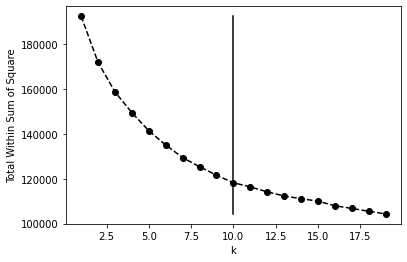

In [ ]:
#Grafico
plt.plot(K, TWSS, 'ko--')
plt.xlabel('k')
plt.ylabel('Total Within Sum of Square')
plt.plot([10,10], [min(TWSS),max(TWSS)], 'k')

O 'k_means.inertia' é utilizado para achar o número ideal de cluster, a partir do metodo 'joelho'

Analisando o gráfico, deduzimos que o ponto 'joelho' seria 10, utilizamos então 10 cluster para a análise.

In [ ]:
#Criamos um modelo para 10 clusters
k_means = KMeans(n_clusters = 10)
k_means.fit(X)

KMeans(n_clusters=10)

In [ ]:
#Separamos os nossos dados em grupos
k_means.labels_

array([7, 7, 7, ..., 2, 2, 0], dtype=int32)

In [ ]:
#Inserimos os grupo na tabela como "Grupo"
df_kmeans['Grupo'] = k_means.labels_
df_kmeans

,Grupo,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,7,0,45,3,0,1,2,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,7,0,49,5,4,5,6,3,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,7,0,51,3,4,1,7,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,7,0,40,4,0,8,6,3,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,7,0,40,3,9,1,2,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0,50,2,4,5,10,3,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,9,1,41,2,8,17,10,3,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,2,1,44,1,0,1,6,3,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,2,1,30,2,4,8,10,3,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
#Fizemos a média das features para cada grupo
df_kmeans.groupby(by='Grupo').mean()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Grupo,,,,,,,,,,,,,,,,,,,
0,0.153383,45.615038,2.511278,6.732331,4.663158,6.909774,12.980451,35.371429,3.324812,2.276692,2.451128,26418.320301,1222.505263,25195.815038,0.760850,6835.436090,76.514286,0.698901,0.054093
1,0.005369,45.535570,2.259060,6.432215,4.170470,6.771812,3.130201,35.253691,2.194631,2.204027,2.151678,10987.747651,1398.789262,9588.958389,0.772804,13417.102013,106.789262,0.732411,0.204162
2,0.999161,46.960570,2.458054,6.838087,3.903523,6.872483,3.041946,36.509228,3.226510,2.748322,3.023490,5616.924832,424.846477,5192.078356,0.669556,2654.857383,42.526007,0.522027,0.106256
3,0.037137,46.210980,3.046825,6.300323,3.348224,6.801399,3.000000,35.831001,3.675457,2.397740,2.153391,3329.966631,1696.582347,1633.384284,0.740360,4294.066200,72.231432,0.749095,0.584009
4,0.001270,46.011429,2.713016,6.772063,3.370159,6.566984,3.000000,35.859683,4.085714,2.302857,2.268571,5927.094222,386.371429,5540.722794,0.734094,3966.732698,70.316190,0.733827,0.061506
5,0.042603,56.549187,1.176607,6.561580,2.851278,6.871418,3.015492,45.062742,4.454686,2.266460,2.553060,4936.797599,1493.044926,3443.752672,0.715845,2926.916344,54.875290,0.672696,0.411819
6,0.098558,47.007212,2.574519,6.664663,4.164663,7.974760,3.000000,36.554087,4.069712,2.306490,2.538462,25618.027644,1208.750000,24409.277644,0.740609,3417.188702,58.618990,0.689018,0.051581
7,0.011494,46.000000,2.359195,6.385057,2.557471,6.454023,3.172414,35.741379,4.362069,2.166667,2.462644,8395.442529,1464.169540,6931.272989,1.330664,2078.977011,39.979885,1.290796,0.308658
8,0.059314,35.353105,1.628360,6.729379,3.215941,6.961075,3.000000,25.527340,4.432808,2.163114,2.715477,5029.189805,1442.392030,3586.797776,0.807338,2993.347544,56.759963,0.696462,0.402358


In [ ]:
#Preparando o modelo para persistência
Persistencia = k_means.fit(X)

In [ ]:
#Vamos persistir nosso modelo, salvando-o num arquivo.
joblib.dump(Persistencia, 'Persistencia k_means')

['Persistencia k_means']

In [ ]:
#Agora podemos carregar o arquivo do modelo e aplicar uma variável para receber seu valor
clfk = load('Persistencia k_means')
clfk.predict(X[0:10])

array([3, 3, 3, 3, 3, 3, 6, 6, 3, 3], dtype=int32)

#Radar chart

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [ ]:
df_grupos = df_kmeans.groupby(by='Grupo').mean()
grupos_col = ['Attrition_Flag', 'Customer_Age' , 'Dependent_count' , 'Months_on_book' , 'Total_Relationship_Count' ,
  'Months_Inactive_12_mon' , 'Contacts_Count_12_mon', 'Credit_Limit' , 'Total_Revolving_Bal' , 'Avg_Open_To_Buy' ,
  'Total_Amt_Chng_Q4_Q1' , 'Total_Trans_Amt' , 'Total_Trans_Ct' , 'Total_Ct_Chng_Q4_Q1' , 'Avg_Utilization_Ratio' ]
df_grupos = df_grupos[grupos_col]

In [ ]:
df_grupos = pd.DataFrame(MinMaxScaler().fit_transform(df_grupos), columns=grupos_col)
df_grupos

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.152435,0.484143,0.713645,0.503910,0.500068,0.194081,0.343480,1.000000,0.638167,1.000000,0.138092,0.419510,0.546845,0.230074,0.004719
1,0.004108,0.480394,0.578785,0.497883,0.000000,0.069912,0.000000,0.331673,0.772714,0.337638,0.156174,1.000000,1.000000,0.273663,0.286577
2,1.000000,0.547623,0.685186,0.562153,0.456573,1.000000,1.000000,0.099052,0.029366,0.151033,0.000000,0.050791,0.038110,0.000000,0.102690
3,0.035943,0.512259,1.000000,0.527435,0.655217,0.400927,0.001965,0.000000,1.000000,0.000000,0.107098,0.195366,0.482740,0.295366,1.000000
4,0.000000,0.502844,0.821513,0.528903,0.836742,0.238792,0.134081,0.112486,0.000000,0.165829,0.097621,0.166496,0.454073,0.275505,0.018642
5,0.041420,1.000000,0.000000,1.000000,1.000000,0.176597,0.460399,0.069595,0.844653,0.076833,0.070017,0.074787,0.222954,0.195988,0.676594
6,0.097493,0.549824,0.747460,0.564449,0.829661,0.245001,0.443655,0.965338,0.627669,0.966619,0.107476,0.118028,0.278989,0.217219,0.000000
7,0.010246,0.502305,0.632327,0.522848,0.959020,0.006071,0.356689,0.219395,0.822614,0.224845,1.000000,0.000000,0.000000,1.000000,0.482839
8,0.058167,0.000000,0.241551,0.000000,0.990320,0.000000,0.646698,0.073597,0.805993,0.082904,0.208411,0.080646,0.251164,0.226902,0.658825
9,0.098569,0.448250,0.657302,0.479986,0.838002,0.282462,0.196373,0.128142,0.626735,0.146320,0.130851,0.157267,0.394853,0.256980,0.495776


In [ ]:
grupos_col = [*grupos_col, grupos_col[0]]
grp = {}

for idx, row in df_grupos.iterrows():
  grp[idx] = [x for x in row]
  grp[idx] = [*grp[idx], grp[idx][0]]

fig = go.Figure(
    data=[go.Scatterpolar(r=grp[x], theta=grupos_col, name= 'Grupo ' + str(x)) for x in grp],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True, 'range': [0, 1]}},
        showlegend=True
    )
)

fig.show()